# Categorizing Irises by Species

> ### Sarah Privette

In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt 
%matplotlib inline

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [81]:

data = pd.read_csv('iris.csv')


### Describing DataSet

In [83]:
data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Preparing for Machine Learning 

In [85]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [86]:
iris = datasets.load_iris()
X = iris.data [:, [2, 3]]
y = iris.target

In [87]:
iris_df = pd.DataFrame(iris.data[:, [2, 3]], columns =iris.feature_names[2:])

In [88]:
print(iris_df.head())

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [94]:
print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()


There are 105 samples in the training set and 45 samples in the test set



In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
x_train_std = sc.transform(X_train)
x_test_std = sc.transform(X_test)

In [96]:
print('After standarizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(x_train_std, columns=iris_df.columns).head())

After standarizing our features, the first 5 rows of our data now look like this:

   petal length (cm)  petal width (cm)
0          -0.182950         -0.293181
1           0.930661          0.737246
2           1.042022          1.638870
3           0.652258          0.350836
4           1.097702          0.737246


### Visualization

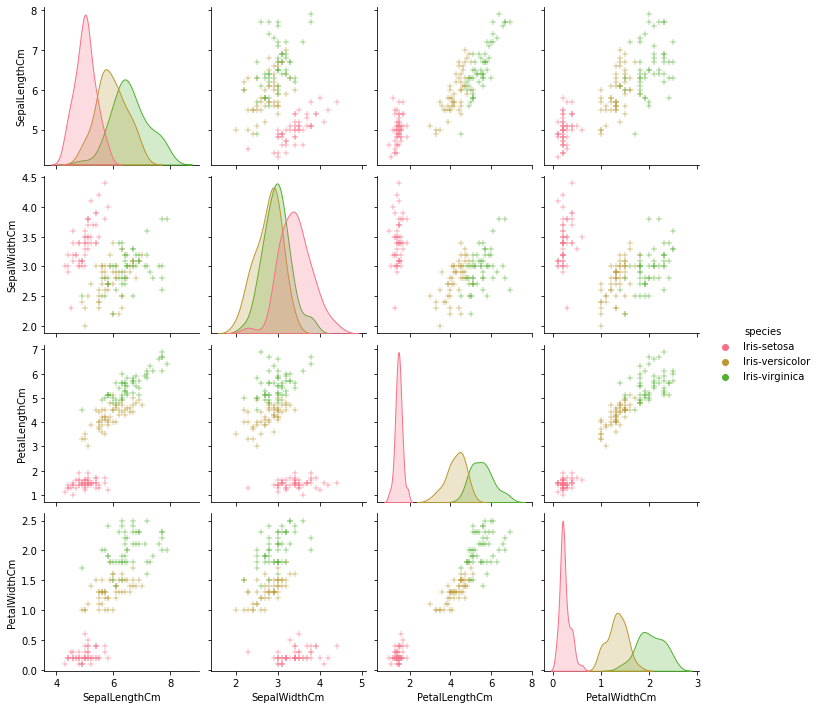

In [100]:
g = sns.pairplot(my_data, hue='species',markers='+')
plt.show()

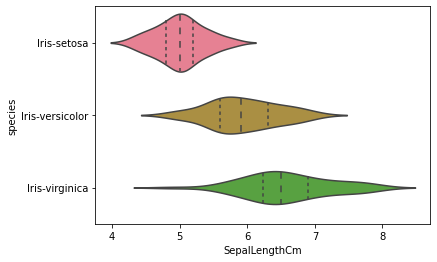

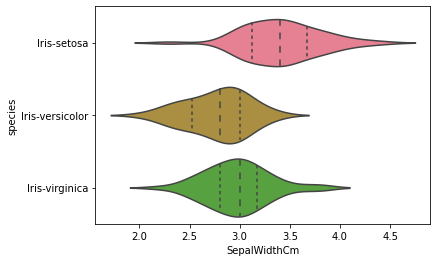

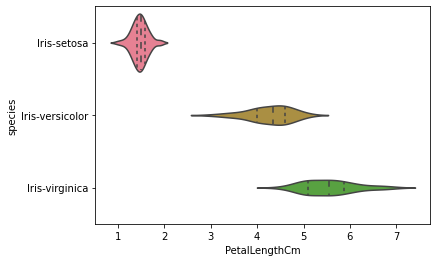

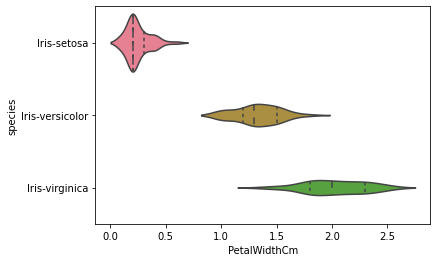

In [101]:
g = sns.violinplot(y= 'species', x= 'SepalLengthCm', data=data, inner= 'quartile')
plt.show()
g = sns.violinplot(y='species', x= 'SepalWidthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y= 'species', x= 'PetalLengthCm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y= 'species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()                   

### K Neighbors Classifier

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train_std, y_train)
print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'. format(knn.score(x_train_std, y_train)))
print('The accuracy of the knn classifier in {:.2f} out of 1 on test data'.format(knn.score(x_test_std, y_test)))

The accuracy of the knn classifier is 0.95 out of 1 on training data
The accuracy of the knn classifier in 1.00 out of 1 on test data


### Support Vector Machine

In [105]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_std, y_train)
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(x_train_std, y_train)))
print('The accury of he svm classifier on test data is {:.2f} out of 1'.format(svm.score(x_test_std, y_test)))

The accuracy of the svm classifier on training data is 0.95 out of 1
The accury of he svm classifier on test data is 0.98 out of 1
